# extended Baseline Model

Refactored code from Week 3 based on mentor feedback

In [1]:
#where am I?
import os
path = os.getcwd()
print(path)

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\exploration\01_eda_minimal_model


In [2]:
#go to path where data_prep and baseline_model are
%cd C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab


In [2]:
# imports and magic line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from emissionscheck_alb import data_prep, baseline_model


ModuleNotFoundError: No module named 'emissionscheck_alb'

In [4]:
#go to data path locally 
%cd C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\data

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\data


In [1]:
df = pd.read_csv("../data/sample.csv", lineterminator='\n')

NameError: name 'pd' is not defined

In [7]:
#cols = df.columns.tolist()
#print(cols)
df_subset=df

In [7]:
# get columns for data exploration
df_subset = df[["ENGINE_SIZE","E_IDLE_DCF","E_IDLE_RPM","E_IDLE_CO_RESULT","E_HIGH_CO_RESULT","E_IDLE_HC_RESULT","E_HIGH_HC_RESULT","MODEL","RecordID", "TEST_SDATE", "TEST_EDATE", "ODOMETER", "VEHICLE_TYPE", "MODEL_YEAR", "FUEL_TYPE", "GVW_TYPE", "OVERALL_RESULT"]]

In [8]:
# get car age
df_subset = data_prep.get_car_age(df_subset)
df_subset.head()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,...,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,CAR_AGE
0,111260,7408,4486883.0,IS329,W036,26351553,I,I,2004-12-16 10:57:00,2004-12-16 11:03:00,...,SANCHEZ,TIM,J,NaN,NaN,0.0,IS329,W036,2006-01-12 21:19:17\r,11
1,138031,969,4437994.0,IS267,W014,17496701,I,I,2004-08-13 14:10:00,2004-08-13 14:12:00,...,Trujillo,Vince,NaN,NaN,NaN,0.0,IS394,W014,2006-01-13 17:43:30\r,5
2,298121,185,NaN,IR354,W109,32641547,I,NaN,2004-08-31 13:03:00,2004-08-31 13:03:00,...,Anderson,Phillip,L,NaN,T,0.0,IR354,W109,2006-01-24 09:07:03\r,16
3,369185,4569,4469421.0,IS359,W042,11117229,I,I,2004-12-02 11:33:00,2004-12-02 11:39:00,...,NGUYEN,DUC,NaN,NaN,NaN,0.0,IS404,W042,2006-01-26 17:03:05\r,20
4,384955,1326,4492858.0,IS171,W052,22095231,I,I,2004-12-29 17:00:00,2004-12-29 17:03:00,...,Nguyen,Kenny,T,NaN,NaN,0.0,IS171,W052,2006-01-31 16:06:03\r,8


In [9]:
# Keep rows with only P or F in OVERALL RESULT
df_subset = data_prep.keep_pass_fail(df_subset)

In [10]:
df_subset.shape

(346783, 128)

## Remove strange odometer values

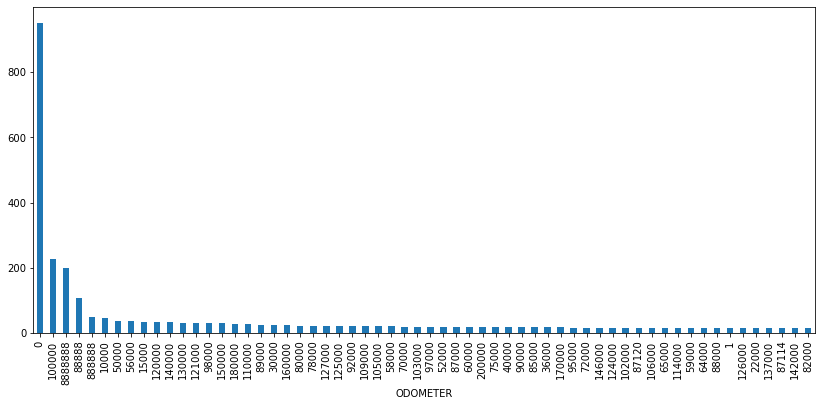

In [11]:
fig, ax = plt.subplots(figsize=(14,6))
df_subset.groupby('ODOMETER').size().sort_values(ascending=False).head(60).plot.bar()

In [12]:
# remove odometer values over 400000
df_subset = df_subset[df_subset['ODOMETER']<=400000]

In [13]:
# exclude 0 odometer values
df_subset = df_subset[df_subset['ODOMETER']>0]

In [14]:
df_subset.shape

(344947, 128)

In [15]:
# exclude 88.888 and 100.000 odometer values
df_subset = df_subset[(df_subset['ODOMETER']!=88888) & (df_subset['ODOMETER']!=100000)]

In [16]:
df_subset.shape

(344613, 128)

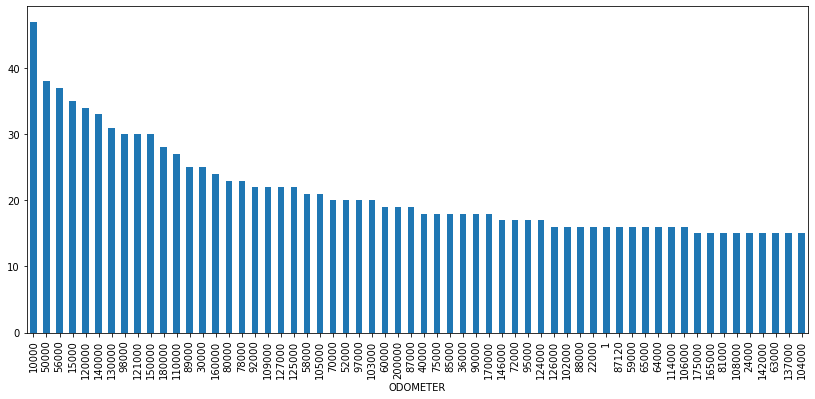

In [17]:
fig, ax = plt.subplots(figsize=(14,6))
df_subset.groupby('ODOMETER').size().sort_values(ascending=False).head(60).plot.bar()

## Encoding target

In [18]:
target = data_prep.encode_target(df_subset["OVERALL_RESULT"])

## Create df of features only

In [19]:
df_features = df_subset[["VEHICLE_TYPE", "FUEL_TYPE", "GVW_TYPE", "ODOMETER", "CAR_AGE"]]

## Logistic Regression

* continuous: odometer, car age
* categorical: vehicle type, fuel_type, gvw_type

In [130]:
# Continuous and categorical features
cat_features = ["VEHICLE_TYPE", "FUEL_TYPE", "GVW_TYPE"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     94503
           1       0.15      0.66      0.25      8881

    accuracy                           0.66    103384
   macro avg       0.55      0.66      0.51    103384
weighted avg       0.89      0.66      0.73    103384

ROC AUC Score is 0.7111820335513006


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.70611694 0.71099995 0.71074987 0.71949379 0.71347102]
Mean cross-validation score: 0.71


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

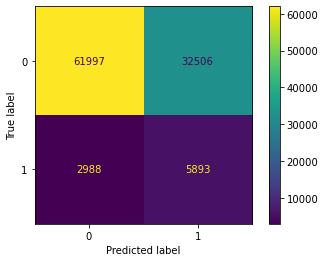

In [132]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg",
                               random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)

## model with continuous features only


              precision    recall  f1-score   support

           0       0.95      0.66      0.78     94503
           1       0.15      0.66      0.25      8881

    accuracy                           0.66    103384
   macro avg       0.55      0.66      0.51    103384
weighted avg       0.88      0.66      0.73    103384

ROC AUC Score is 0.7091929771857153
Cross-validation scores: [0.70435047 0.70873196 0.70888487 0.71772481 0.7117578 ]
Mean cross-validation score: 0.71


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

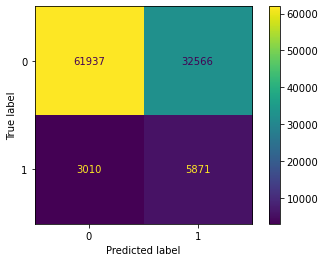

In [22]:

features_train, features_test, target_train, target_test = data_prep.split_data(features_matrix = df_features[["ODOMETER", "CAR_AGE"]],
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced")

In [ ]:
## logistic regression with "MODEL"

In [22]:
df_features = df_subset[["MODEL", "FUEL_TYPE", "GVW_TYPE", "ODOMETER", "CAR_AGE"]]

In [23]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL", "FUEL_TYPE", "GVW_TYPE"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.67      0.79     94503
           1       0.16      0.69      0.27      8881

    accuracy                           0.67    103384
   macro avg       0.56      0.68      0.53    103384
weighted avg       0.89      0.67      0.74    103384

ROC AUC Score is 0.7371125232108308


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.72852654 0.73683405 0.72878957 0.73694811 0.73079248]
Mean cross-validation score: 0.73


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    random_state=42))])

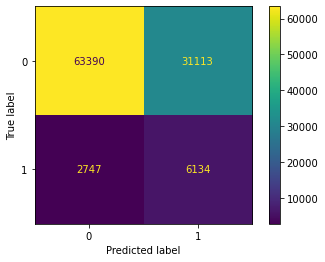

In [24]:
# increasing number of iterations because of warning: does it work?
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=200)

### SVC with "MODEL" - DON'T RUN! it is still not done after ~ three hours :(

In [ ]:
## baseline_model.run_baseline_model(features_train, 
                        #        features_test, 
                         #       target_train, 
                          #      target_test, 
                           #     model = "svc", 
                            #    class_weight="balanced")

## logistic regression with "CYL"

In [42]:
# exclude 88.888 and 100.000 odometer values
df_subset = df_subset[df_subset['CYL']!="R"]

In [43]:
df_features = df_subset[["CYL", "MODEL", "FUEL_TYPE", "GVW_TYPE", "ODOMETER", "CAR_AGE","MODEL"]]

In [47]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL", "FUEL_TYPE", "GVW_TYPE"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.67      0.79     94493
           1       0.16      0.68      0.26      8867

    accuracy                           0.67    103360
   macro avg       0.56      0.68      0.53    103360
weighted avg       0.89      0.67      0.74    103360

ROC AUC Score is 0.7336748271939283


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.73310746 0.73881828 0.73238691 0.73285964 0.73389528]
Mean cross-validation score: 0.73


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

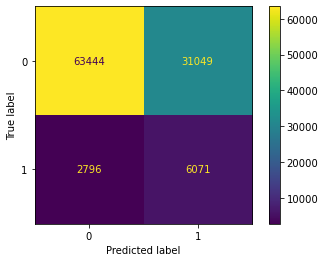

In [48]:
# increasing number of iterations because of warning: does it work?
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)

##reducing features to: Odometer, car_age, model

In [51]:
df_features = df_subset[["ODOMETER", "CAR_AGE","MODEL"]]

In [52]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.67      0.79     94493
           1       0.16      0.69      0.26      8867

    accuracy                           0.67    103360
   macro avg       0.56      0.68      0.53    103360
weighted avg       0.89      0.67      0.74    103360

ROC AUC Score is 0.7349237509060049


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.73381488 0.7397418  0.73349038 0.73415966 0.73412585]
Mean cross-validation score: 0.74


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

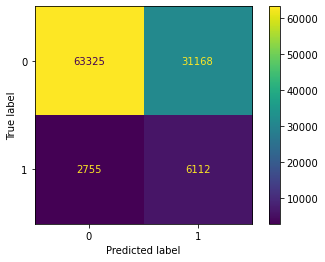

In [53]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)

## check engine size

In [17]:
df_features = df_subset[["ODOMETER", "CAR_AGE","MODEL","ENGINE_SIZE"]]

In [18]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.67      0.79     94503
           1       0.17      0.69      0.27      8881

    accuracy                           0.67    103384
   macro avg       0.56      0.68      0.53    103384
weighted avg       0.89      0.67      0.74    103384

ROC AUC Score is 0.738099296245001


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.73011087 0.73801152 0.73081301 0.73898028 0.73257516]
Mean cross-validation score: 0.73


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

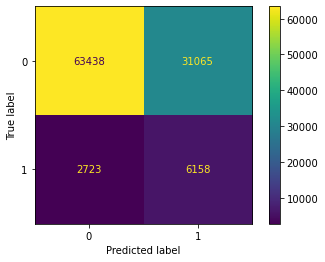

In [70]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     94503
           1       0.14      0.73      0.24      8881

    accuracy                           0.60    103384
   macro avg       0.55      0.66      0.49    103384
weighted avg       0.89      0.60      0.69    103384

ROC AUC Score is 0.7131940667228835
Cross-validation scores: [0.7108245  0.71301058 0.71234587 0.72198258 0.71439098]
Mean cross-validation score: 0.71


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_leaf_nodes=16, n_estimators=500))])

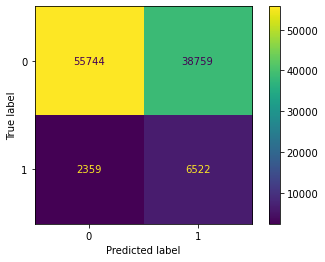

In [24]:
 #try Random Forest Classifier
baseline_model.run_baseline_model(features_train, 
                              features_test, 
                              target_train, 
                                target_test, 
                                model = "rf", 
                                class_weight="balanced",
                                 max_leaf_nodes=16,
                                 n_estimators=500)

In [26]:
#retrieve feature importance for random forest classifier
importances = rf.feature_importances_
print(importances)

NameError: name 'rf' is not defined

## modeling emissions
* adding **CO*
* getting rid of engine-size, it doesnt seem to help much
* use **logistic regression**, it seems to be the best model so far

In [39]:
df_features = df_subset[["ODOMETER", "CAR_AGE","MODEL","E_HIGH_CO"]]

In [40]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.71      0.82     94503
           1       0.18      0.67      0.28      8881

    accuracy                           0.71    103384
   macro avg       0.57      0.69      0.55    103384
weighted avg       0.89      0.71      0.77    103384

ROC AUC Score is 0.7563639875559554


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.74856155 0.75435404 0.74876219 0.75878097 0.75348594]
Mean cross-validation score: 0.75


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

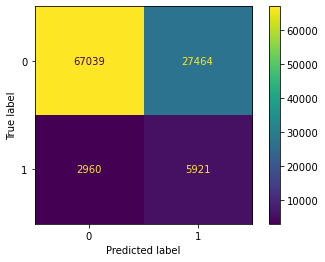

In [41]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)

### adding CO2

In [82]:
df_features = df_subset[["ODOMETER", "CAR_AGE","MODEL","E_HIGH_CO","E_HIGH_CO2","E_HIGH_O2","E_HIGH_HC"]]

In [83]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.72      0.82     94503
           1       0.18      0.67      0.29      8881

    accuracy                           0.71    103384
   macro avg       0.57      0.69      0.55    103384
weighted avg       0.89      0.71      0.77    103384

ROC AUC Score is 0.7614618555775178


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.75338048 0.76070411 0.7541996  0.76334939 0.75839359]
Mean cross-validation score: 0.76


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

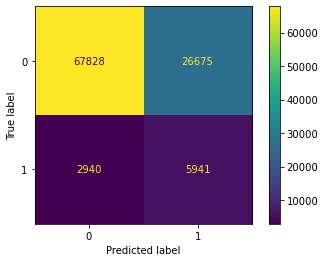

In [84]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)


In [97]:
df_features = df_subset[["ODOMETER", "CAR_AGE","MODEL","E_IDLE_CO","E_IDLE_CO2","E_IDLE_O2","E_IDLE_HC"]]

In [98]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL"]

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.71      0.82     94503
           1       0.18      0.68      0.29      8881

    accuracy                           0.71    103384
   macro avg       0.57      0.70      0.55    103384
weighted avg       0.89      0.71      0.77    103384

ROC AUC Score is 0.7645590334680019


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.75638673 0.76316    0.75538998 0.76835178 0.75808864]
Mean cross-validation score: 0.76


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

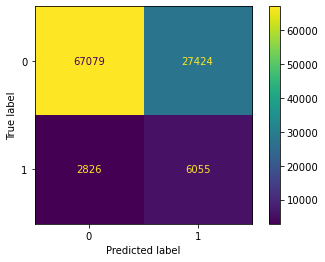

In [99]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)


In [122]:
df["E_IDLE_CO_RESULT"].value_counts()

N    295568
P     53623
F      2857
Name: E_IDLE_CO_RESULT, dtype: int64

In [21]:
df_subset['E_IDLE_CO_RESULT']=df_subset['E_IDLE_CO_RESULT'].replace({'P':1, 'F':0,'N':3})

In [124]:
df["E_IDLE_HC_RESULT"].value_counts()

N    295568
P     50649
F      5831
Name: E_IDLE_HC_RESULT, dtype: int64

In [20]:
df_subset['E_IDLE_HC_RESULT']=df_subset['E_IDLE_HC_RESULT'].replace({'P':1, 'F':0,'N':3})

In [19]:
df_features = df_subset[["ODOMETER", "CAR_AGE","MODEL","E_IDLE_CO_RESULT","E_IDLE_HC_RESULT"]]

In [127]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ["MODEL",'E_IDLE_HC_RESULT','E_IDLE_CO_RESULT']

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.75      0.84     94503
           1       0.20      0.66      0.30      8881

    accuracy                           0.74    103384
   macro avg       0.58      0.70      0.57    103384
weighted avg       0.89      0.74      0.79    103384

ROC AUC Score is 0.7747961984176261


c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hanna\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

Cross-validation scores: [0.76553298 0.77399459 0.7664893  0.78062417 0.76732822]
Mean cross-validation score: 0.77


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=42))])

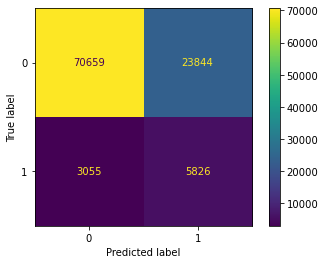

In [128]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)

In [20]:
df_features = df_subset[["E_IDLE_CO_RESULT","E_IDLE_HC_RESULT"]]

In [21]:
# Continuous and categorical features - substitute MAKE by MODEL
cat_features = ['E_IDLE_HC_RESULT','E_IDLE_CO_RESULT']

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     94503
           1       1.00      0.20      0.33      8881

    accuracy                           0.93    103384
   macro avg       0.97      0.60      0.65    103384
weighted avg       0.94      0.93      0.91    103384

ROC AUC Score is 0.6039046185266193


NameError: name 'cv_score' is not defined

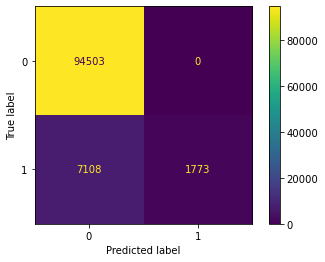

In [22]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=100)

## Iterative Feature Selection

In [19]:
df_features = df_subset.drop(['OVERALL_RESULT'], axis=1)

In [20]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344613 entries, 0 to 375502
Columns: 128 entries, RecordID to CAR_AGE
dtypes: float64(43), int64(29), object(56)
memory usage: 339.2+ MB


In [30]:
df_subset.select_dtypes(include=['object'])

,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,...,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,Station_License_Number,Analyzer_Number,Insert_DateTime\r
0,IS329,W036,26351553,I,I,2004-12-16 10:57:00,2004-12-16 11:03:00,1FTCR10A8RUE42421,S,NPE42421,...,P,P,SANCHEZ,TIM,J,NaN,NaN,IS329,W036,2006-01-12 21:19:17\r
1,IS267,W014,17496701,I,I,2004-08-13 14:10:00,2004-08-13 14:12:00,1G1JC5249Y7453635,S,CKK700,...,N,N,Trujillo,Vince,NaN,NaN,NaN,IS394,W014,2006-01-13 17:43:30\r
3,IS359,W042,11117229,I,I,2004-12-02 11:33:00,2004-12-02 11:39:00,1JCNJ15U6FT075960,M,469FNH,...,P,P,NGUYEN,DUC,NaN,NaN,NaN,IS404,W042,2006-01-26 17:03:05\r
4,IS171,W052,22095231,I,I,2004-12-29 17:00:00,2004-12-29 17:03:00,1G8ZJ5273VZ102496,S,NP102496,...,N,N,Nguyen,Kenny,T,NaN,NaN,IS171,W052,2006-01-31 16:06:03\r
5,IS139,W102,23867222,I,I,2004-07-23 11:10:00,2004-07-23 11:12:00,1FAFP40491F121873,S,FAX071,...,N,N,FRIEND,RICHARD,NaN,NaN,NaN,IS139,W102,2006-01-17 16:38:37\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375498,IR170,W092,AC086427,I,NaN,2019-12-31 17:08:07,2019-12-31 17:11:55,KM8JU3AC5DU556706,S,PLR585,...,N,N,CROSLEY,DORIAN,G,2.4L,NaN,IR170,W092,2019-12-31 16:12:37\r
375499,IS292,W060,AC084470,I,NaN,2019-12-31 17:30:28,2019-12-31 17:32:24,1G6KD57Y47U163536,S,437TJX,...,N,N,Ruiz,Miguel,J,NaN,NaN,IS292,W060,2019-12-31 16:32:58\r
375500,IS365,W020,AC084133,I,NaN,2019-12-31 08:31:49,2019-12-31 08:34:00,1GNUKBE04AR268621,S,NPJ744,...,N,N,Iniguez,Obed,X,NaN,NaN,IS365,W020,2020-01-01 08:52:39\r
375501,IS365,W020,AC084133,I,NaN,2019-12-31 12:15:27,2019-12-31 12:19:43,5NMSKDAG7AH374807,S,947TGS,...,N,N,Iniguez,Obed,X,3.5L,NaN,IS365,W020,2020-01-01 08:52:39\r


In [3]:
cat_features = ['STATION_NUM','ANALYZER_NUM','INSPECTOR_NUM','TEST_TYPE','VID_TEST_TYPE','TEST_SDATE','TEST_EDATE','VIN','VIN_SOURCE','VEH_LICENSE','E_IDLE_CO_RESULT','E_IDLE_HC_RESULT','MECHANIC_LAST_NAME','MECHANIC_FIRST_NAME','MECHANIC_MIDDLE_INIT','ENGINE_SIZE_ORIG','FAILED_IDLE_RPM','Station_License_Number','Analyzer_Number','Insert_DateTime\r']

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

NameError: name 'data_prep' is not defined